In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [157]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [159]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [160]:
df.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,False


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [162]:
df["Cabin"] = df["Cabin"].astype(str)

In [163]:
df["Cabin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
8693 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


In [164]:
df[["Deck", "Number", "Side"]] = df["Cabin"].str.split("/", expand=True)
df["Number"] = pd.to_numeric(df["Number"], errors="coerce")

In [165]:
df = df[["PassengerId", "HomePlanet", "CryoSleep", "Deck", "Number", "Side", "Destination", "Age", "VIP", "Transported", "Cabin"]]

In [166]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Number,Side,Destination,Age,VIP,Transported,Cabin
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,False,B/0/P
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,True,F/0/S
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,False,A/0/S
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,False,A/0/S
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,True,F/1/S


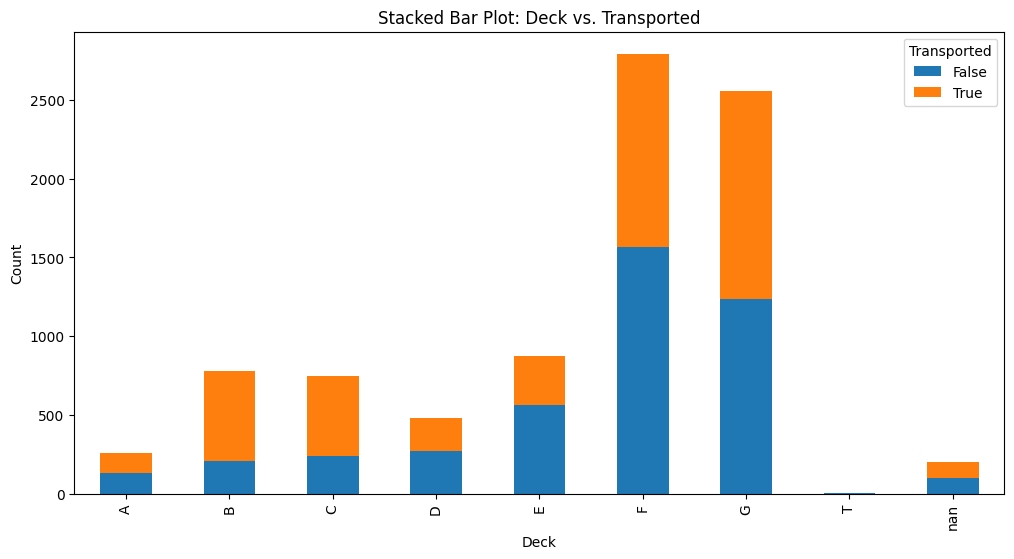

In [167]:
cabin_transported = df.groupby(['Deck', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Deck vs. Transported')
plt.legend(title='Transported')
plt.show()

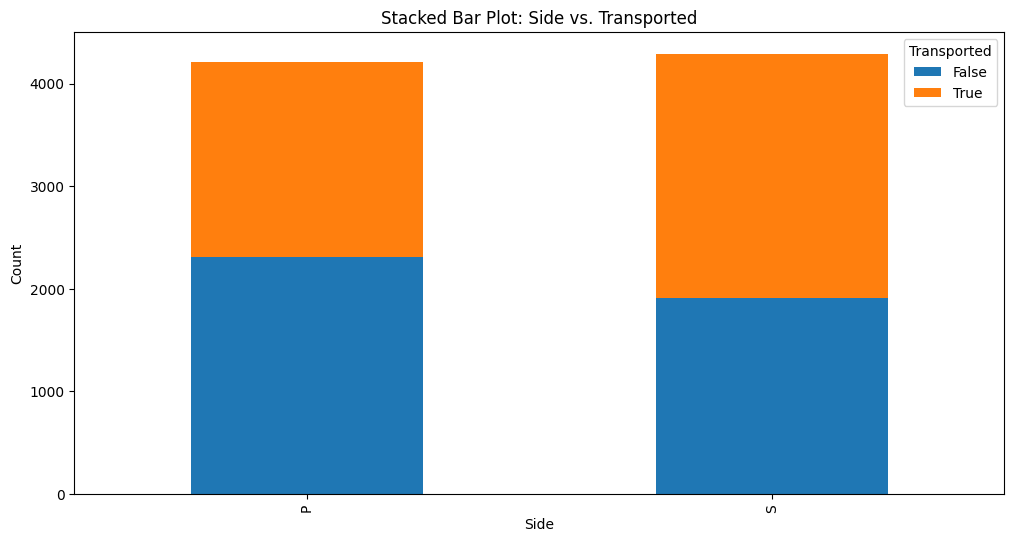

In [168]:
cabin_transported = df.groupby(['Side', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Side')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Side vs. Transported')
plt.legend(title='Transported')
plt.show()

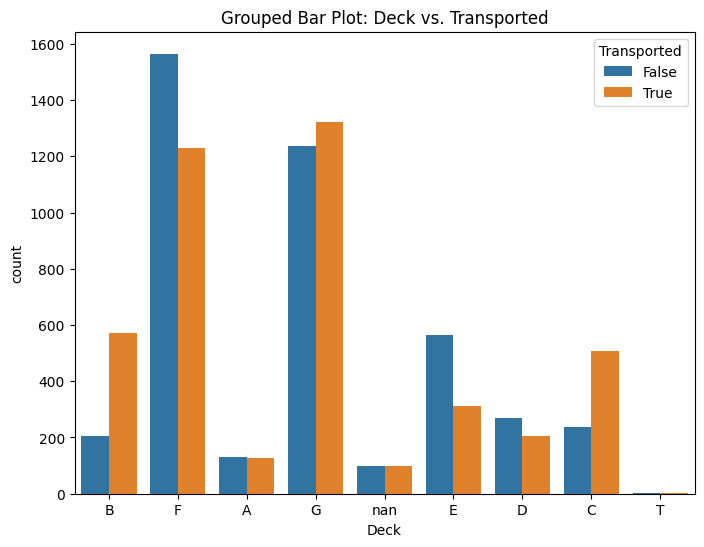

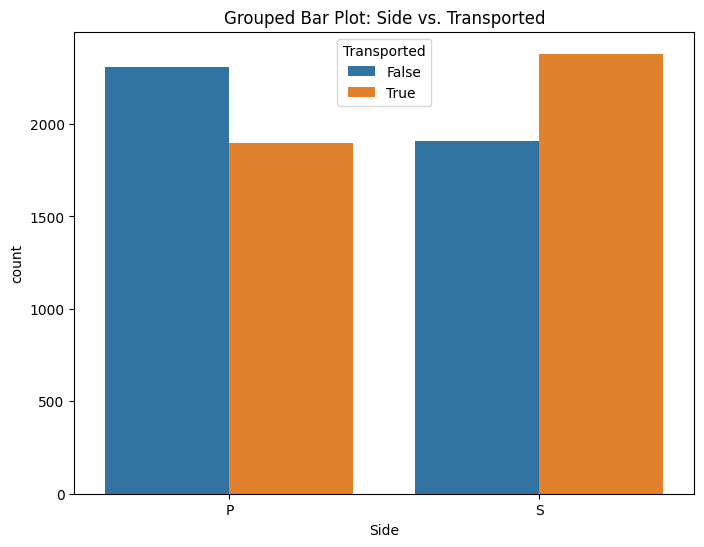

In [169]:
# # Parse the Cabin column: First letter as Deck, last as Side
# df['Deck'] = df['Cabin'].str[0]
# df['Side'] = df['Cabin'].str[-1]

# Plot (by Deck)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Deck', hue='Transported')
plt.title('Grouped Bar Plot: Deck vs. Transported')
plt.show()

# Plot (by Side)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Side', hue='Transported')
plt.title('Grouped Bar Plot: Side vs. Transported')
plt.show()

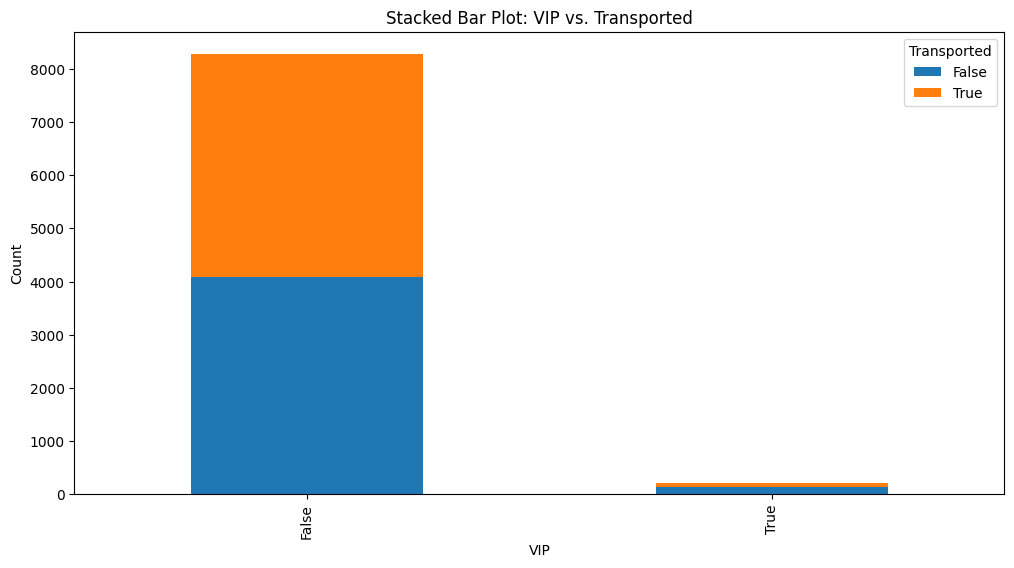

In [170]:
cabin_transported = df.groupby(['VIP', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: VIP vs. Transported')
plt.legend(title='Transported')
plt.show()

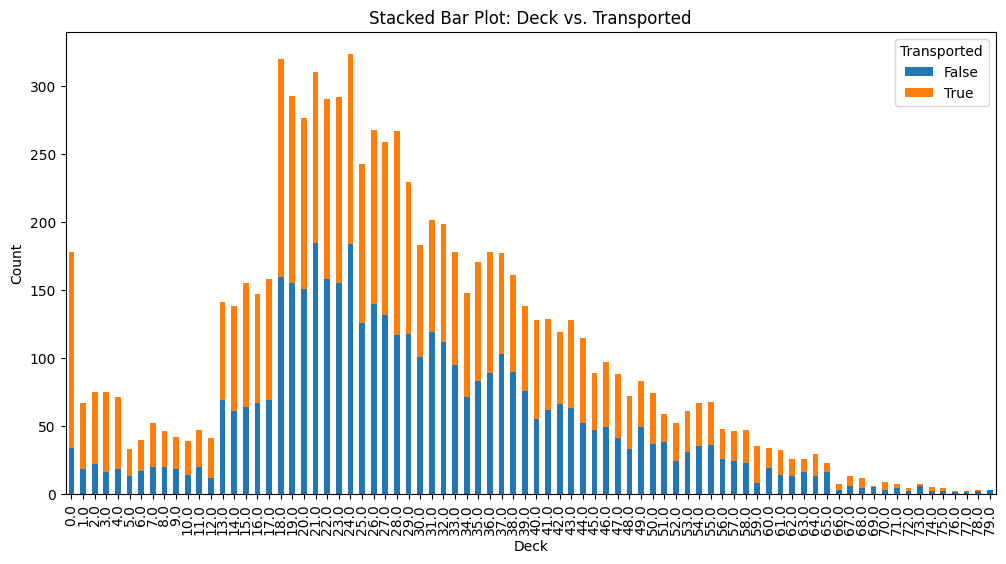

In [171]:
cabin_transported = df.groupby(['Age', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Deck vs. Transported')
plt.legend(title='Transported')
plt.show()

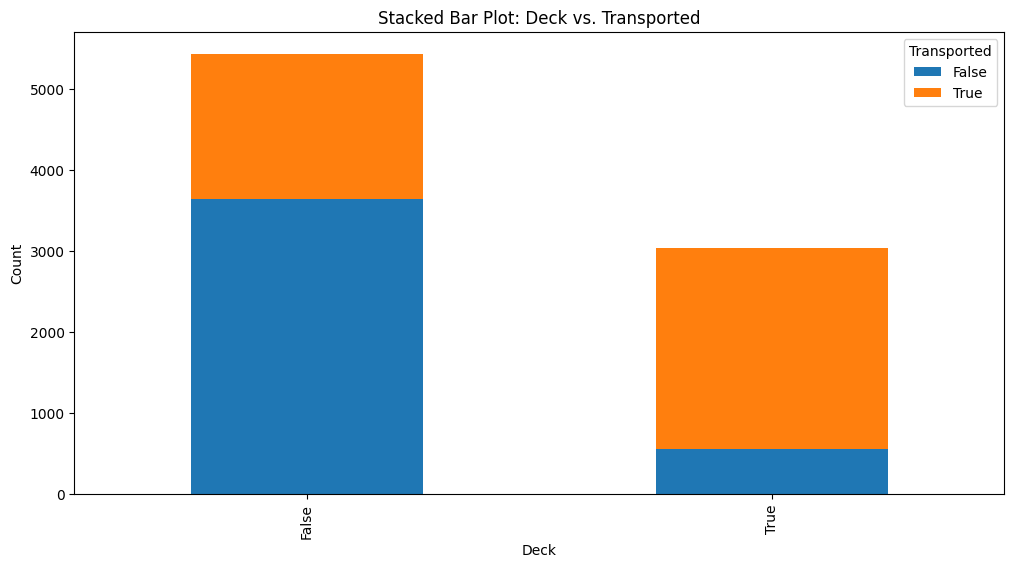

In [172]:
cabin_transported = df.groupby(['CryoSleep', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Deck vs. Transported')
plt.legend(title='Transported')
plt.show()

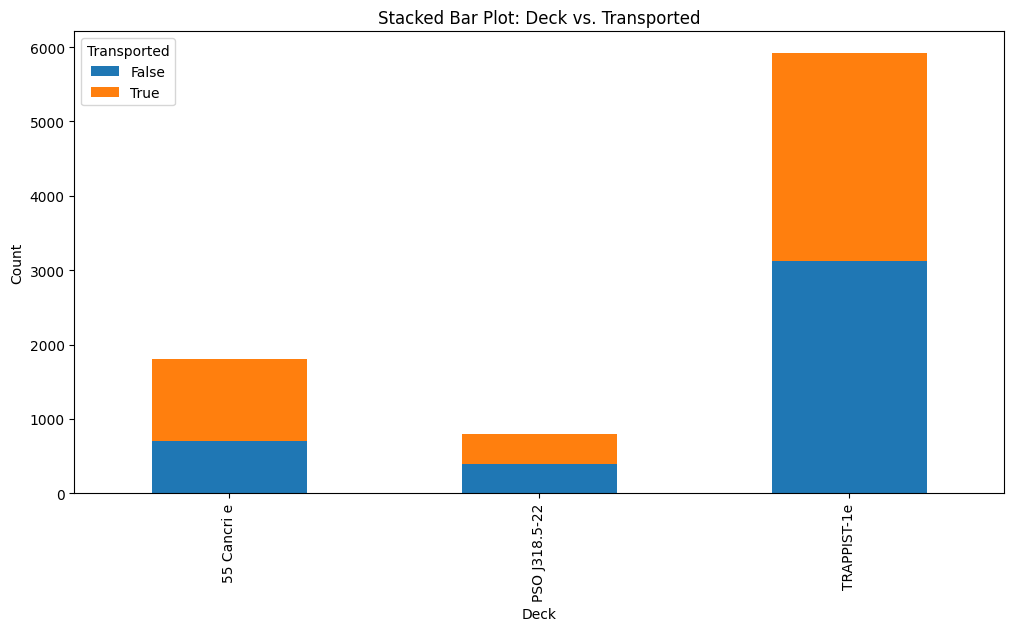

In [173]:
cabin_transported = df.groupby(['Destination', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Deck vs. Transported')
plt.legend(title='Transported')
plt.show()

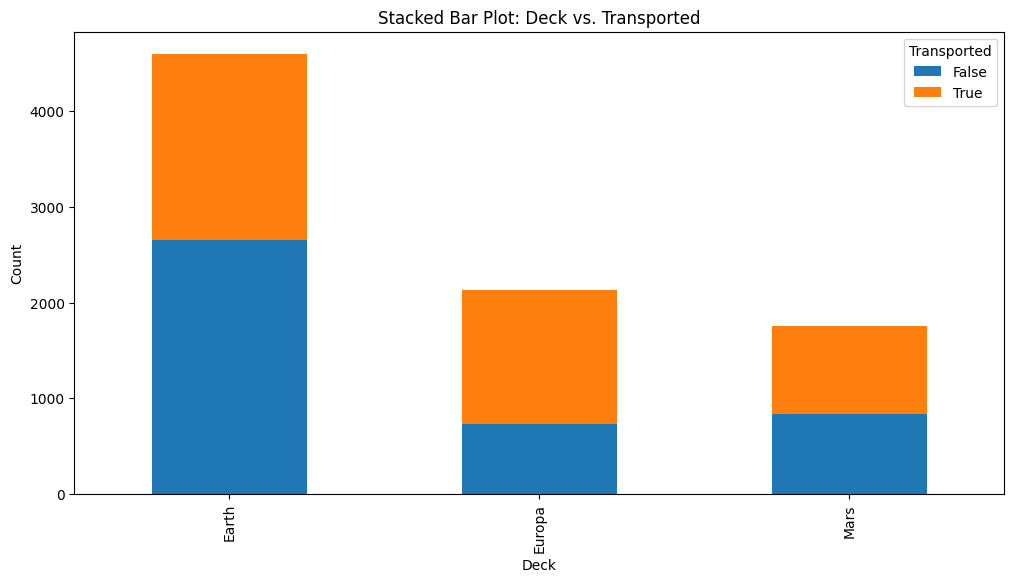

In [174]:
cabin_transported = df.groupby(['HomePlanet', 'Transported']).size().unstack(fill_value=0)

# Plot
cabin_transported.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Deck vs. Transported')
plt.legend(title='Transported')
plt.show()

In [175]:
df = df.drop(columns=["Cabin"])

In [176]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Number,Side,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,True


In [179]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Number,Side,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,True


In [180]:
print(Test_y.count())

1739


In [183]:
#need to change categprical fata into numerical: u(will use OneHotEncoding)
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ["HomePlanet"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols)
)

In [186]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Number,Side,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,True


In [188]:
numerical_cols = ["PassengerId", "Age", "CryoSleep", "Deck", "Number", "Side", "Destination", "VIP", "Transported"]
final_df = pd.concat(
    [encoded_df, df[numerical_cols].reset_index(drop=True)], axis=1
)

print(final_df)


      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  HomePlanet_nan  \
0                  0.0                1.0              0.0             0.0   
1                  1.0                0.0              0.0             0.0   
2                  0.0                1.0              0.0             0.0   
3                  0.0                1.0              0.0             0.0   
4                  1.0                0.0              0.0             0.0   
...                ...                ...              ...             ...   
8688               0.0                1.0              0.0             0.0   
8689               1.0                0.0              0.0             0.0   
8690               1.0                0.0              0.0             0.0   
8691               0.0                1.0              0.0             0.0   
8692               0.0                1.0              0.0             0.0   

     PassengerId   Age CryoSleep Deck  Number Side    Destinati

In [189]:
final_df.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,PassengerId,Age,CryoSleep,Deck,Number,Side,Destination,VIP,Transported
0,0.0,1.0,0.0,0.0,0001_01,39.0,False,B,0.0,P,TRAPPIST-1e,False,False
1,1.0,0.0,0.0,0.0,0002_01,24.0,False,F,0.0,S,TRAPPIST-1e,False,True
2,0.0,1.0,0.0,0.0,0003_01,58.0,False,A,0.0,S,TRAPPIST-1e,True,False
3,0.0,1.0,0.0,0.0,0003_02,33.0,False,A,0.0,S,TRAPPIST-1e,False,False
4,1.0,0.0,0.0,0.0,0004_01,16.0,False,F,1.0,S,TRAPPIST-1e,False,True


In [190]:
Train, Test = train_test_split(final_df, test_size=0.2, random_state=42)
Train_X = Train.drop("Transported", axis=1)
Train_y = Train["Transported"]
Test_X = Test.drop("Transported", axis=1)
Test_y = Test["Transported"]

In [193]:
Train.count()

HomePlanet_Earth     6954
HomePlanet_Europa    6954
HomePlanet_Mars      6954
HomePlanet_nan       6954
PassengerId          6954
Age                  6806
CryoSleep            6777
Deck                 6954
Number               6796
Side                 6796
Destination          6815
VIP                  6792
Transported          6954
dtype: int64

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

LR = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    solver='liblinear',  #Good for small datasets ig 
    max_iter=1000
)


LR.fit(Train_X, Train_y)
y_pred = LR.predict(X_test)


print(f"predicted accuracy: {y_pred}")

ValueError: could not convert string to float: 'F'